Biosignalverarbeitung Praktikum 3 - Auswertung Daten Elisabeth Krepper (MVC, Weight, Fatigue)

1. Vorverarbeitung der EMG-Daten

In [2]:
#Bibliotheken importieren

%pip install matplotlib numpy scipy

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sc
import Lab3Functions as lf3

Note: you may need to restart the kernel to use updated packages.


c:\Users\elisa\Desktop\MCI\3_MGST_WS_2425(3)\Biosignalverarbeitung\Praktikum3\Tests_gesamt_Lisi\Lab3Functions.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fatigue_raw = pd.concat([fatigue_raw, pd.read_csv(


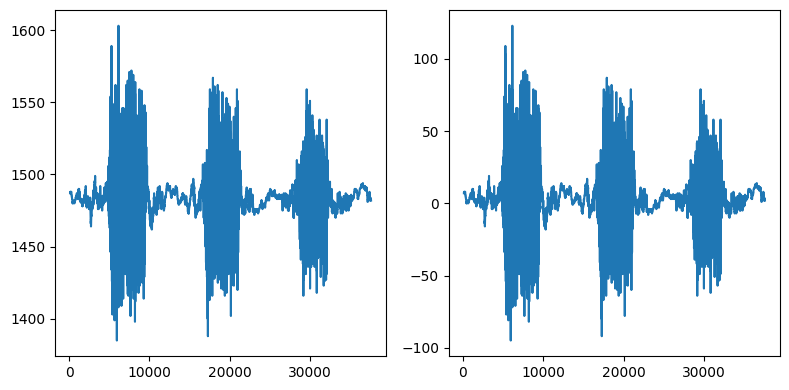

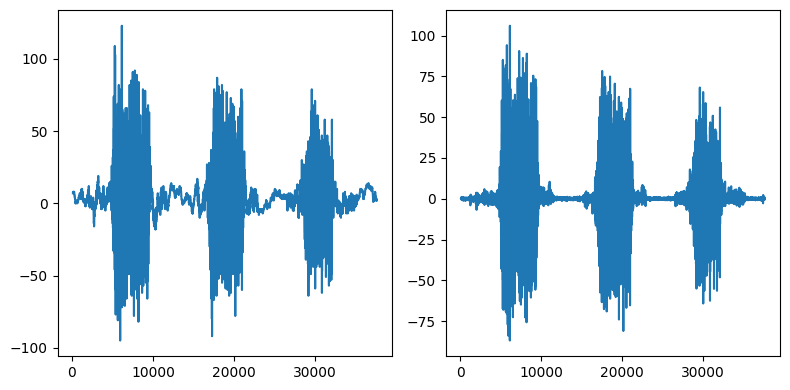

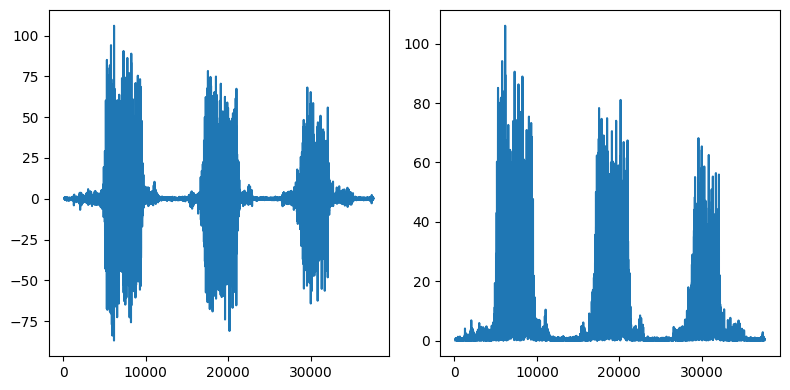

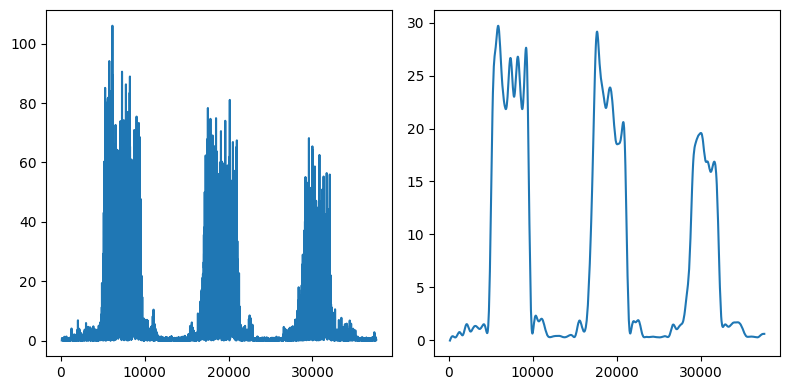

In [ ]:
#Importieren der Daten
weights, mvc, fatigue = lf3.import_data('\t')

#Offset von ca. 1480 im emg Datensatz entfernen
mvc_offsetclean = mvc['emg'] - 1480

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc['emg'])
axes[1].plot(mvc['t'], mvc_offsetclean)
fig.tight_layout()

#Butterworth Filter (20 Hz bis 450 Hz) anwenden (nicht im lf3)
b, a = sc.butter(4, [20/500, 450/500], btype='bandpass')
mvc_filtered = sc.filtfilt(b, a, mvc_offsetclean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc_offsetclean)
axes[1].plot(mvc['t'], mvc_filtered)
fig.tight_layout()

#Gleichrichten der Daten (nicht im lf3)
mvc_rectified = np.abs(mvc_filtered)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc_filtered)
axes[1].plot(mvc['t'], mvc_rectified)
fig.tight_layout()

#Einhüllende Bilden: Tiefpass Grenfrequenz 3 Hz (nicht im lf3)
b, a = sc.butter(4, 3/500, btype='lowpass')
mvc_envelope = sc.filtfilt(b, a, mvc_rectified)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].plot(mvc['t'], mvc_rectified)
axes[1].plot(mvc['t'], mvc_envelope)
fig.tight_layout()



#ACHTUNG ZEIT NOCH NICHT IN SEKUNDEN
#Beschriftungen!